<a href="https://colab.research.google.com/github/swastikbanerjee/ML_Lab/blob/main/2348566_Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.frequent_patterns.fpgrowth import fpgrowth

In [61]:
data = pd.read_csv("/content/Market_Basket_Optimisation.csv")

In [62]:
data.shape

(7500, 20)

In [63]:
data.head()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
df = pd.DataFrame(data)

# Flatten the DataFrame into a single list
flattened_list = df.iloc[:, 0:].values.flatten().tolist()

# Remove NaN values from the list
flattened_list = [item for item in flattened_list if pd.notna(item)]

print(flattened_list)

['burgers', 'meatballs', 'eggs', 'chutney', 'turkey', 'avocado', 'mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea', 'low fat yogurt', 'whole wheat pasta', 'french fries', 'soup', 'light cream', 'shallot', 'frozen vegetables', 'spaghetti', 'green tea', 'french fries', 'eggs', 'pet food', 'cookies', 'turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil', 'spaghetti', 'champagne', 'cookies', 'mineral water', 'salmon', 'mineral water', 'shrimp', 'chocolate', 'chicken', 'honey', 'oil', 'cooking oil', 'low fat yogurt', 'turkey', 'eggs', 'turkey', 'fresh tuna', 'tomatoes', 'spaghetti', 'mineral water', 'black tea', 'salmon', 'eggs', 'chicken', 'extra dark chocolate', 'meatballs', 'milk', 'honey', 'french fries', 'protein bar', 'red wine', 'shrimp', 'pasta', 'pepper', 'eggs', 'chocolate', 'shampoo', 'rice', 'sparkling water', 'spaghetti', 'mineral water', 'ham', 'body spray', 'pancakes', 'green tea', 'burgers', 'grated cheese', 'shrimp', 'pasta', 'avocado', 'honey', '

In [65]:
from collections import Counter
# Count the frequency of each item
item_frequency = Counter(flattened_list)

# Sort the item frequencies in decreasing order
sorted_frequency = sorted(item_frequency.items(), key=lambda x: x[1], reverse=True)

# Print the sorted frequency of each item
for item, frequency in sorted_frequency:
    print(f"{item}: {frequency}")

mineral water: 1787
eggs: 1348
spaghetti: 1306
french fries: 1282
chocolate: 1230
green tea: 990
milk: 972
ground beef: 737
frozen vegetables: 715
pancakes: 713
burgers: 654
cake: 608
cookies: 603
escalope: 595
low fat yogurt: 573
shrimp: 535
tomatoes: 513
olive oil: 493
frozen smoothie: 474
turkey: 469
chicken: 450
whole wheat rice: 439
grated cheese: 393
cooking oil: 383
soup: 379
herb & pepper: 371
honey: 355
champagne: 351
fresh bread: 323
salmon: 318
brownies: 253
avocado: 249
hot dogs: 243
cottage cheese: 238
tomato juice: 227
butter: 226
whole wheat pasta: 221
red wine: 211
yogurt cake: 205
light mayo: 204
energy bar: 203
ham: 203
pepper: 199
energy drink: 199
cereals: 193
vegetables mix: 192
muffins: 181
oil: 173
french wine: 169
fresh tuna: 167
strawberries: 160
meatballs: 157
almonds: 152
parmesan cheese: 149
mushroom cream sauce: 143
rice: 141
protein bar: 139
mint: 131
white wine: 124
pasta: 118
light cream: 117
carrots: 115
black tea: 107
tomato sauce: 106
fromage blanc: 1

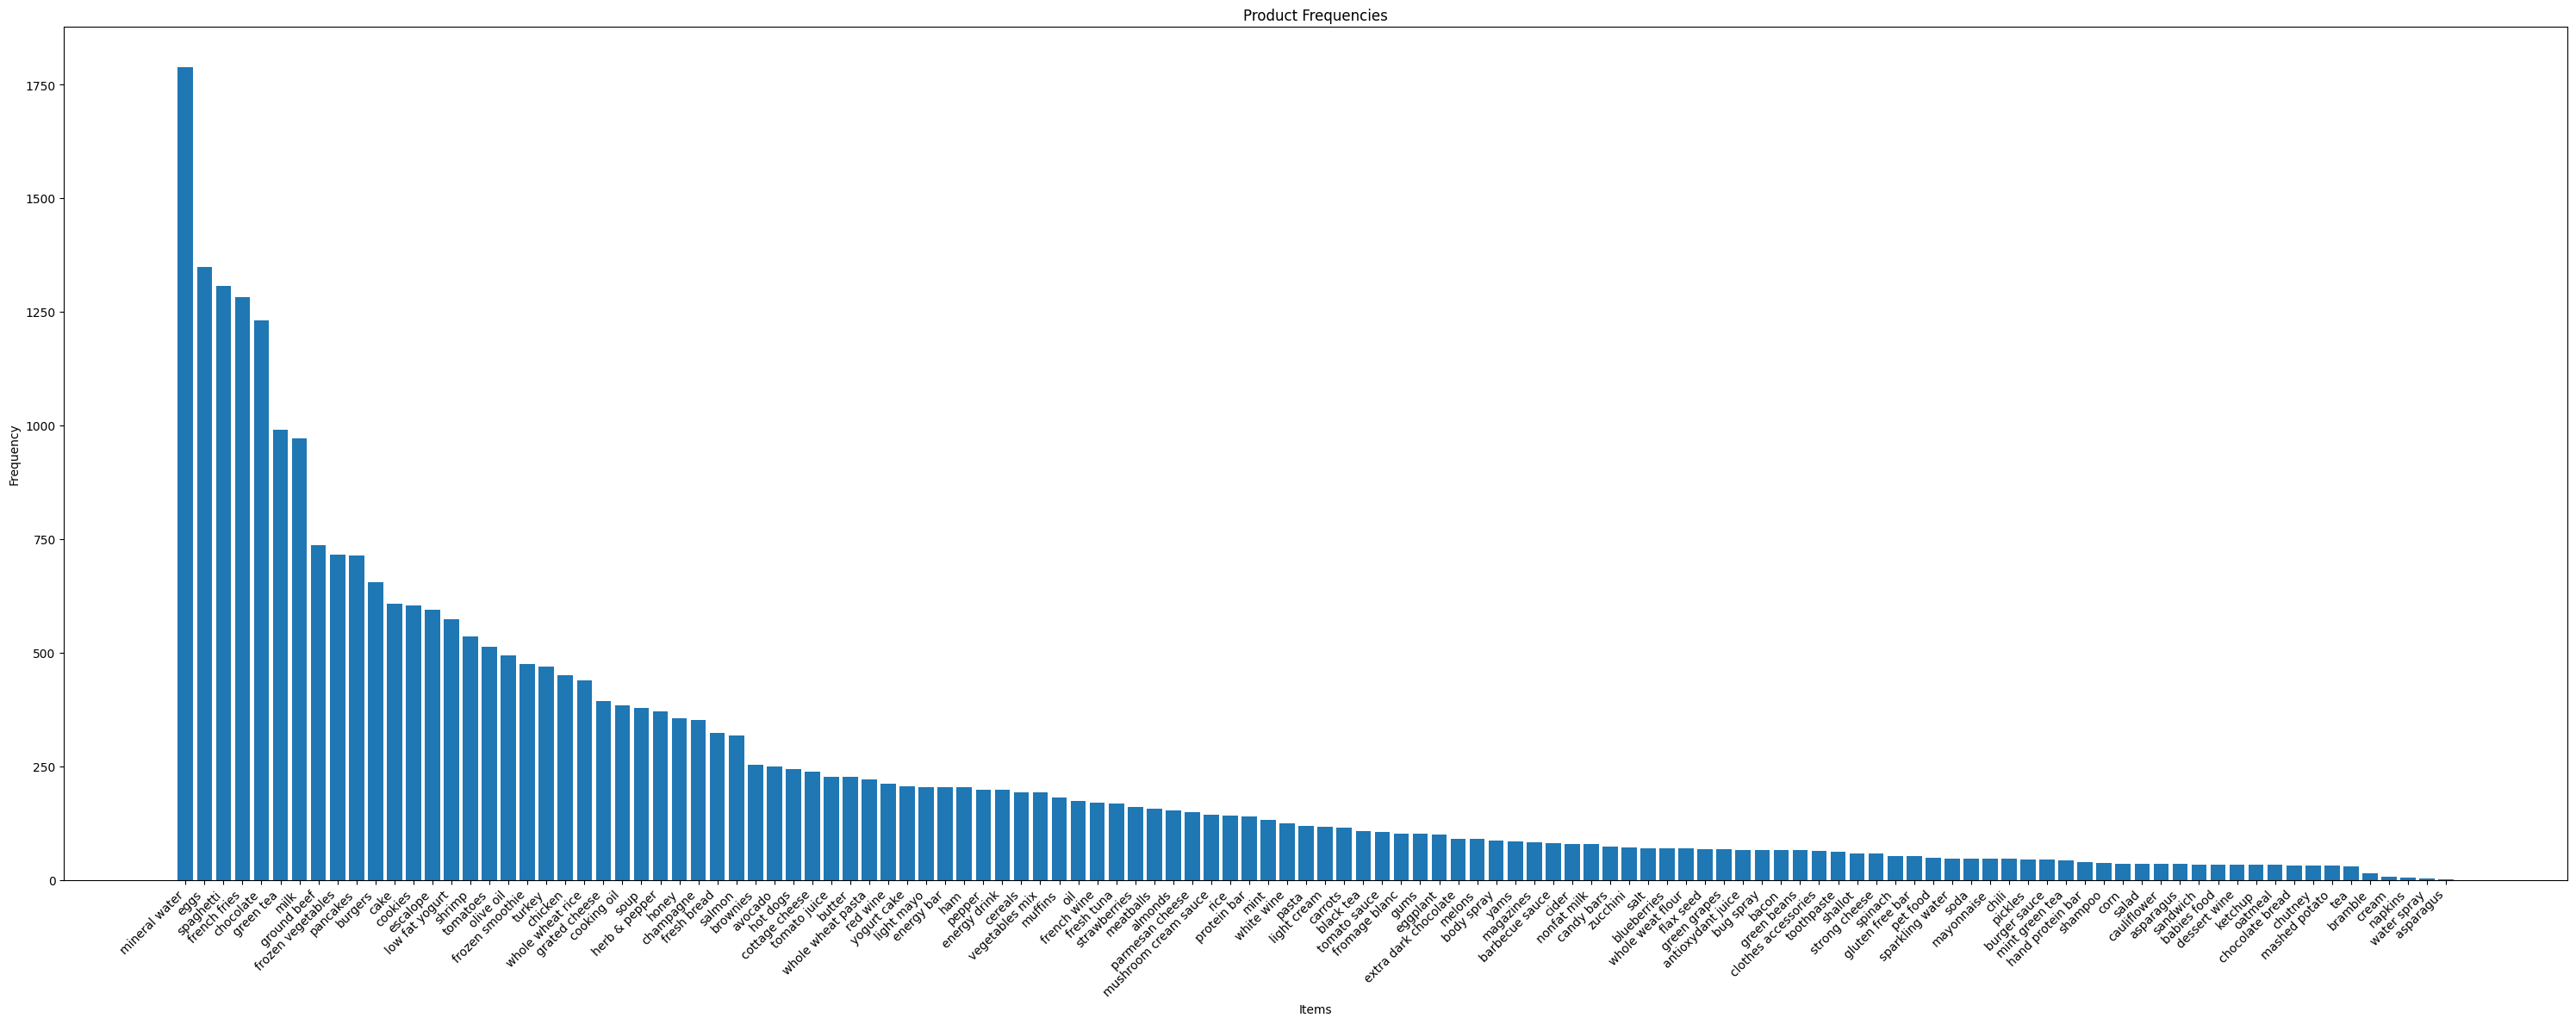

In [66]:
# Extract items and frequencies for plotting
items = [item for item, frequency in sorted_frequency]
frequencies = [frequency for item, frequency in sorted_frequency]

plt.figure(figsize=(30, 12))

# Create a bar plot
plt.bar(items, frequencies)
plt.xlabel('Items')
plt.ylabel('Frequency')
plt.title('Product Frequencies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

In [67]:
# Extract unique items
unique_items = [item for item, _ in sorted_frequency]

# Create a binary matrix DataFrame
binary_matrix = pd.DataFrame(columns=unique_items)

# Populate the binary matrix
for i, item in enumerate(unique_items):
    binary_matrix[item] = [1 if item in transaction else 0 for transaction in flattened_list]

# Print the binary matrix
print(binary_matrix)

       mineral water  eggs  spaghetti  french fries  chocolate  green tea  \
0                  0     0          0             0          0          0   
1                  0     0          0             0          0          0   
2                  0     1          0             0          0          0   
3                  0     0          0             0          0          0   
4                  0     0          0             0          0          0   
...              ...   ...        ...           ...        ...        ...   
29338              0     0          0             0          0          1   
29339              0     1          0             0          0          0   
29340              0     0          0             0          0          0   
29341              0     0          0             0          0          0   
29342              0     0          0             0          0          0   

       milk  ground beef  frozen vegetables  pancakes  ...  oatmeal  \
0   

In [68]:
frequent_itemset = apriori(binary_matrix,min_support=0.01,use_colnames=True)
frequent_itemset

,support,itemsets
0,0.060900,(mineral water)
1,0.045939,(eggs)
2,0.044508,(spaghetti)
3,0.043690,(french fries)
4,0.046076,(chocolate)
5,0.035170,(green tea)
6,0.035784,(milk)
7,0.025117,(ground beef)
8,0.024367,(frozen vegetables)
9,0.024299,(pancakes)


In [69]:
ar = association_rules(frequent_itemset,metric='lift',min_threshold=1) #A lift value greater than 1 indicates a positive association between the items.
filtered_ar = ar [(ar['confidence']>0.4)] #minimum confidence value is 40%
filtered_ar

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(green tea),(tea),0.035170,0.039805,0.035170,1.000000,25.122432,0.033770,inf,0.995196
1,(tea),(green tea),0.039805,0.035170,0.035170,0.883562,25.122432,0.033770,8.286185,1.000000
2,(cake),(pancakes),0.052006,0.024299,0.024299,0.467235,19.228702,0.023035,1.831390,1.000000
3,(pancakes),(cake),0.024299,0.052006,0.024299,1.000000,19.228702,0.023035,inf,0.971603
4,(oil),(olive oil),0.035750,0.016801,0.016801,0.469971,27.972355,0.016201,1.854992,1.000000
5,(olive oil),(oil),0.016801,0.035750,0.016801,1.000000,27.972355,0.016201,inf,0.980728
6,(whole wheat rice),(rice),0.014961,0.019766,0.014961,1.000000,50.591379,0.014665,inf,0.995122
7,(rice),(whole wheat rice),0.019766,0.014961,0.014961,0.756897,50.591379,0.014665,4.051934,1.000000
8,(cooking oil),(oil),0.013053,0.035750,0.013053,1.000000,27.972355,0.012586,inf,0.977003
10,(herb & pepper),(pepper),0.012644,0.019425,0.012644,1.000000,51.478947,0.012398,inf,0.993131


In [70]:
freq_itemset = fpgrowth(binary_matrix, min_support=0.01, use_colnames=True)
sorted_freq_itemset = freq_itemset.sort_values(by='support', ascending=False)
print(sorted_freq_itemset)

     support                  itemsets
3   0.060900           (mineral water)
27  0.052006                    (cake)
22  0.046076               (chocolate)
1   0.045939                    (eggs)
14  0.044508               (spaghetti)
11  0.043690            (french fries)
7   0.039805                     (tea)
4   0.035784                    (milk)
16  0.035750                     (oil)
37  0.035170          (green tea, tea)
8   0.035170               (green tea)
31  0.025117             (ground beef)
13  0.024367       (frozen vegetables)
28  0.024299                (pancakes)
40  0.024299          (cake, pancakes)
0   0.022288                 (burgers)
15  0.020550                 (cookies)
33  0.020277                (escalope)
18  0.020141                     (ham)
5   0.019766                    (rice)
9   0.019528          (low fat yogurt)
26  0.019425                  (pepper)
21  0.018233                  (shrimp)
25  0.017483                (tomatoes)
42  0.016801          (oi

In [71]:
best_choices=ar.sort_values(by='lift',ascending=False)
print('Best Choices are...')
print(best_choices[['antecedents','consequents','lift']])

Best Choices are...
           antecedents         consequents       lift
10     (herb & pepper)            (pepper)  51.478947
11            (pepper)     (herb & pepper)  51.478947
6   (whole wheat rice)              (rice)  50.591379
7               (rice)  (whole wheat rice)  50.591379
12               (ham)         (champagne)  49.649746
13         (champagne)               (ham)  49.649746
4                (oil)         (olive oil)  27.972355
5          (olive oil)               (oil)  27.972355
8        (cooking oil)               (oil)  27.972355
9                (oil)       (cooking oil)  27.972355
0          (green tea)               (tea)  25.122432
1                (tea)         (green tea)  25.122432
2               (cake)          (pancakes)  19.228702
3           (pancakes)              (cake)  19.228702


In [72]:
best_choices=ar.sort_values(by='lift',ascending=False)
print('Best Choices are...')
print(best_choices[['antecedents','consequents','lift']])

Best Choices are...
           antecedents         consequents       lift
10     (herb & pepper)            (pepper)  51.478947
11            (pepper)     (herb & pepper)  51.478947
6   (whole wheat rice)              (rice)  50.591379
7               (rice)  (whole wheat rice)  50.591379
12               (ham)         (champagne)  49.649746
13         (champagne)               (ham)  49.649746
4                (oil)         (olive oil)  27.972355
5          (olive oil)               (oil)  27.972355
8        (cooking oil)               (oil)  27.972355
9                (oil)       (cooking oil)  27.972355
0          (green tea)               (tea)  25.122432
1                (tea)         (green tea)  25.122432
2               (cake)          (pancakes)  19.228702
3           (pancakes)              (cake)  19.228702
